#STEP 1: Simulated Dataset Creation

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
import random

In [3]:
#2.set seed for reproducibility

#Why 42 is common?
#It’s just a popular default used by many developers because of this fun quote:
#“The answer to life, the universe and everything is 42.”— The Hitchhiker’s Guide to the Galaxy

np.random.seed(42)


In [4]:
# 3. Define products
products = [
    ('P01', 'Milk', 'Dairy'),
    ('P02', 'Bread', 'Bakery'),
    ('P03', 'Soap', 'Household'),
    ('P04', 'Rice', 'Grains'),
    ('P05', 'Chips', 'Snacks'),
    ('P06', 'Eggs', 'Dairy'),
    ('P07', 'Tea', 'Beverages'),
    ('P08', 'Sugar', 'Grains'),
    ('P09', 'Shampoo', 'Personal Care'),
    ('P10', 'Biscuits', 'Snacks')
]

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [5]:
# 4. Generate synthetic data
data = []

for i in range(1000):
    pid, pname, category = random.choice(products)
    price = round(np.random.uniform(20, 150), 2)
    competitor_price = round(price + np.random.uniform(-10, 10), 2)
    discount = round(np.random.uniform(0, 20), 2)
    day = random.choice(days)
    inventory = np.random.randint(10, 100)
    demand_score = round(np.random.uniform(0.3, 0.9), 2)

    # Units sold depends on price, discount, and demand
    units_sold = max(0, int(
        inventory * demand_score * (1 + discount/100) * (1 - (price - competitor_price)/100)
    ))

    data.append([
        pid, pname, category, price, competitor_price, discount,
        day, inventory, units_sold, demand_score
    ])


In [6]:
# 5. Convert to DataFrame
df = pd.DataFrame(data, columns=[
    'product_id', 'product_name', 'category', 'price', 'competitor_price',
    'discount', 'day_of_week', 'inventory_level', 'units_sold', 'demand_score'
])

In [73]:
df.to_csv('kirana_price_data.csv', index=False)


In [7]:
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,57,0.66
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,38,0.44


#STEP 2: Exploratory Data Analysis (EDA)

import lib

In [8]:
#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#set style for seaborn

sns.set(style="whitegrid" ) # Set the background style only
sns.set_palette=("pastel")  # Set the color palette separately

In [10]:
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,57,0.66
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,38,0.44


2. Inspect DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        1000 non-null   object 
 1   product_name      1000 non-null   object 
 2   category          1000 non-null   object 
 3   price             1000 non-null   float64
 4   competitor_price  1000 non-null   float64
 5   discount          1000 non-null   float64
 6   day_of_week       1000 non-null   object 
 7   inventory_level   1000 non-null   int64  
 8   units_sold        1000 non-null   int64  
 9   demand_score      1000 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [12]:
df.describe()

,price,competitor_price,discount,inventory_level,units_sold,demand_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,87.049020,86.983380,9.892020,54.192000,36.031000,0.610350
std,37.200695,37.892701,5.717749,26.215384,21.563976,0.172785
min,20.030000,11.180000,0.020000,10.000000,3.000000,0.300000
25%,55.547500,55.845000,5.090000,31.000000,19.000000,0.457500
50%,88.485000,87.810000,10.215000,55.000000,32.000000,0.620000
75%,119.940000,120.210000,14.775000,75.000000,50.000000,0.760000
max,149.510000,158.820000,19.990000,99.000000,100.000000,0.900000


In [13]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
price,0
competitor_price,0
discount,0
day_of_week,0
inventory_level,0
units_sold,0
demand_score,0


3. Distribution Plots

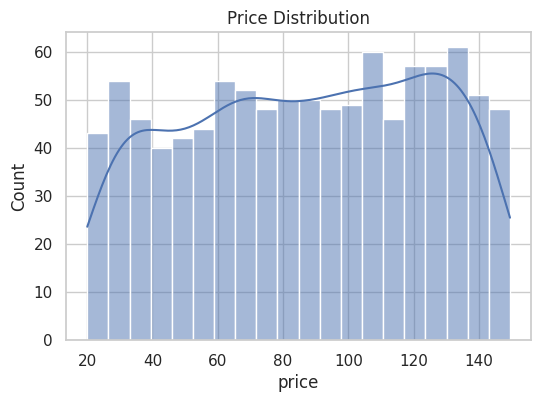

In [14]:
#price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'],bins=20,kde=True)
plt.title('Price Distribution')
plt.show()

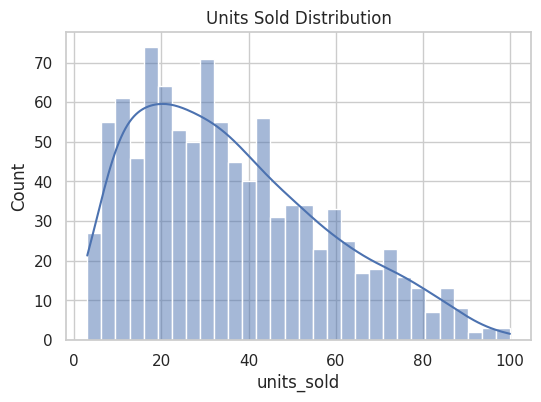

In [15]:
#units sold distribution
plt.figure(figsize=(6,4))
sns.histplot(df['units_sold'],bins=30,kde=True)
plt.title('Units Sold Distribution')
plt.show()

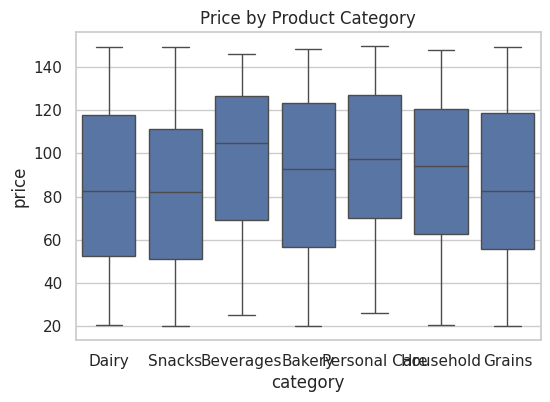

In [16]:
#price by category
plt.figure(figsize=(6,4))
sns.boxplot(x='category',y='price',data=df)
plt.title('Price by Product Category')
plt.show()

4. Relationships: Price, Discount vs Units Sold

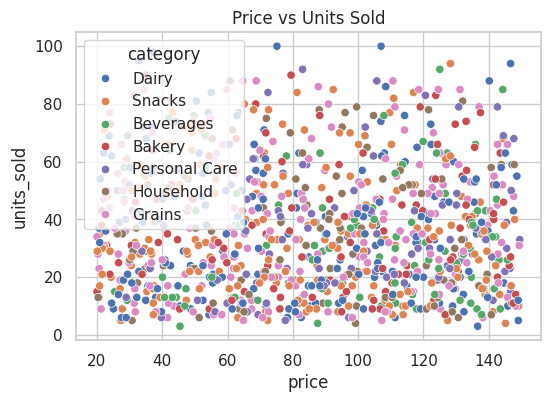

In [17]:
#price vs units sold
plt.figure(figsize=(6,4))
sns.scatterplot(x='price', y='units_sold' , hue='category' , data=df)
plt.title('Price vs Units Sold')
plt.show()

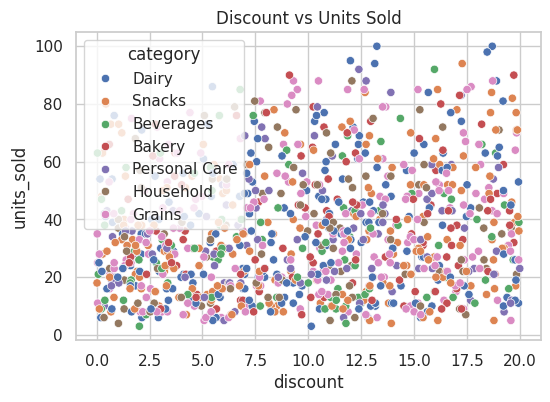

In [18]:
#discount vs units sold
plt.figure(figsize=(6,4))
sns.scatterplot(x='discount',y='units_sold',hue='category',data=df)
plt.title('Discount vs Units Sold')
plt.show()

 5. Correlation Heatmap

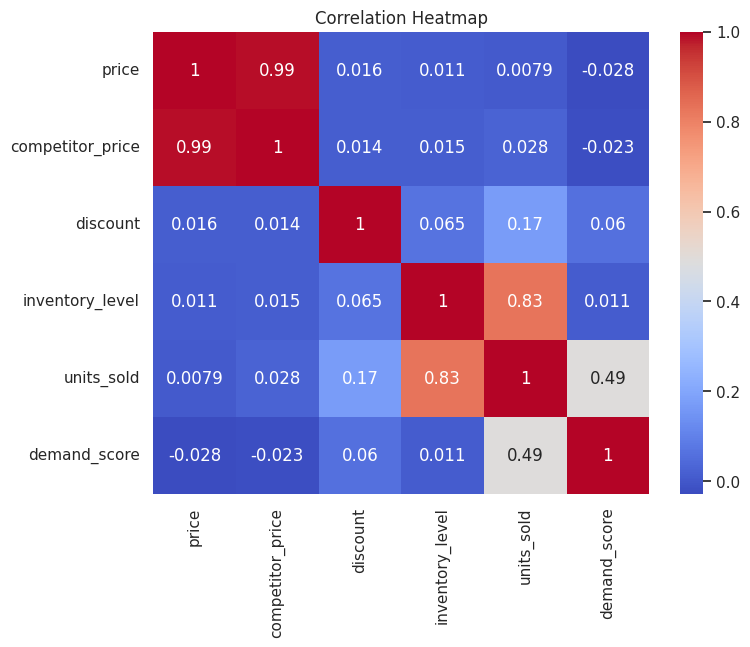

In [19]:
#correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Grouped Summary Stats

In [20]:
# Average units sold per category
avg_units_by_category = df.groupby('category')['units_sold'].mean().sort_values(ascending=False)
print("avg_units_by_category")
print(avg_units_by_category)

avg_units_by_category
category
Bakery           38.067308
Household        36.979381
Grains           36.929648
Dairy            36.473171
Personal Care    35.612245
Snacks           34.995000
Beverages        32.680412
Name: units_sold, dtype: float64


In [21]:
#Add revenue column
df['revenue'] = df['price'] * df['units_sold']

In [22]:
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score,revenue
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,57,0.66,3915.33
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69,1715.12
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41,136.65
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47,2104.32
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,38,0.44,3782.52


In [23]:
#top revenue-genrating products
top_revenue_prodcuts = df.groupby('product_name')['revenue'].mean().sort_values(ascending=False)
print("top_revenue_products")
print(top_revenue_prodcuts)

top_revenue_products
product_name
Sugar       3634.525888
Shampoo     3443.879082
Bread       3378.440192
Soap        3302.797320
Tea         3156.441856
Milk        3076.533860
Eggs        3039.098022
Chips       2875.812151
Biscuits    2809.361682
Rice        2642.698152
Name: revenue, dtype: float64


7. Units Sold by Day of Week


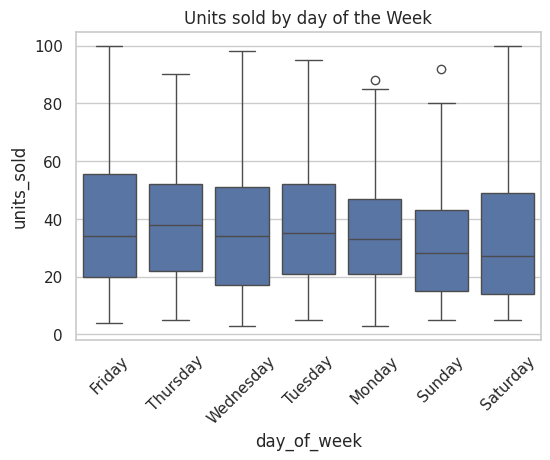

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='day_of_week' , y='units_sold',data=df)
plt.title("Units sold by day of the Week")
plt.xticks(rotation=45)
plt.show()

### 🔍 Key Insights from EDA:

- Higher discounts and lower prices generally lead to more units sold.
- Snacks and Dairy products sell better on average.
- Revenue varies greatly by product — high unit price does not always mean more revenue.
- Weekends may show slightly higher demand patterns.


#STEP 3: Build a Machine Learning Model to Predict Demand

Objective:
"Given price, discount, competitor_price, inventory, and is_weekend — can I predict how many units will be sold?"

In [25]:
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score,revenue
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,57,0.66,3915.33
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69,1715.12
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41,136.65
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47,2104.32
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,38,0.44,3782.52


## Adding 'inventory' column in the features to make it more

here we can add 'inventory' in the features to make it more like real world .

2. How It Affects units_sold:

❌ Out of stock	=> Customers come but can’t buy → sales lost → units_sold = 0.

❗ Low inventory => Store limits how many units can be sold (rationing).

✅ Optimal inventory	=> Satisfies full demand → maximum possible units_sold.

💸 Overstocking	=> Doesn't directly affect units_sold, but increases cost


Step 1. Simulate Inventory Column => We want to simulate how much stock is available for each product on each day.

In [26]:
np.random.seed(42)
df['inventory'] = df['units_sold'] + np.random.randint(-10, 15 , size=len(df))

# Inventory = Demand ± Random
# ➤ This creates a random number between -10 and +14 for each row
# ➤ Simulates that some days the shop understocks (negative) and some days overstocks (positive)



df['inventory'] = df['inventory'].clip(lower=0)

# Ensures that inventory never goes below 0 (because negative stock doesn't make sense).
# clip(lower=0) replaces any negative inventory values with 0.


In [27]:
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score,revenue,inventory
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,57,0.66,3915.33,53
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69,1715.12,31
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41,136.65,9
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47,2104.32,48
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,38,0.44,3782.52,35


Step2.Adjust units_sold based on inventory

If demand > inventory, the store cannot meet full demand → only sell what’s in stock

In [28]:
df['true_demand'] = df['units_sold']
#This is just backing up the original column —
#we save the original demand before modifying it.

#true_demand: what customers wanted
#units_sold: what the store actually sold

df['units_sold'] = df[['units_sold' , 'inventory']].min(axis=1)

#For every row:
#If inventory is enough, units sold stays the same.
#If inventory is less, we reduce units sold to match inventory.
#It takes the minimum of the two for each row.

In [29]:
# Optional: check how often stockouts happened
stockout_rate = (df['true_demand'] > df['inventory']).mean() * 100
print(f"Stockouts occurred in {stockout_rate:.2f}% of rows")

Stockouts occurred in 40.20% of rows


## Adding 'date' column in the features to use the 'is_weekend'

Let’s add a date column now (just one-time setup), and then derive is_weekend from it

Without is_weekend:

1.Model treats all days the same

2.May underpredict demand for Sat/Sun

3.Simpler data prep.

With is_weekend:

1.Learns that weekends = more sales

2.Can adjust pricing/inventory for weekends

3.More accurate, smarter predictions



In [30]:
#create a sequence of dates
start_date = pd.to_datetime('2024-01-01') #pd.to_datetime()=>converts a string "2024-01-01" into a real datetime object that pandas understands.
df['date'] = pd.date_range(start=start_date , periods=len(df),freq='D') #Creates a full list of dates starting from start_date (2024-01-01),freq='D' tells pandas to go day-by-day
df.head()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score,revenue,inventory,true_demand,date
0,P06,Eggs,Dairy,68.69,77.70,14.64,Friday,70,53,0.66,3915.33,53,57,2024-01-01
1,P10,Biscuits,Snacks,77.96,69.96,9.18,Thursday,33,22,0.69,1715.12,31,22,2024-01-02
2,P05,Chips,Snacks,27.33,31.77,18.77,Wednesday,11,5,0.41,136.65,9,5,2024-01-03
3,P01,Milk,Dairy,43.84,39.92,10.50,Tuesday,98,48,0.47,2104.32,48,48,2024-01-04
4,P07,Tea,Beverages,99.54,92.33,5.84,Monday,89,35,0.44,3782.52,35,38,2024-01-05


In [31]:
#create is_weekend flag (1if sat/sun , else 0)
df['is_weekend'] = df['date'].dt.dayofweek>=5
#First part: df['date'].dt.dayofweek extracts the day of the week from each date.
##Then it checks: "Is this day >= 5?" (i.e., is it Saturday or Sunday?)

df['is_weekend'] = df['is_weekend'].astype(int)
#Converts the column from True/False to 1/0
df.tail()

,product_id,product_name,category,price,competitor_price,discount,day_of_week,inventory_level,units_sold,demand_score,revenue,inventory,true_demand,date,is_weekend
995,P06,Eggs,Dairy,110.61,107.87,17.59,Monday,33,14,0.38,1548.54,28,14,2026-09-22,0
996,P03,Soap,Household,99.56,95.69,6.52,Thursday,88,69,0.88,7865.24,69,79,2026-09-23,0
997,P08,Sugar,Grains,108.29,110.92,5.41,Friday,12,8,0.68,866.32,18,8,2026-09-24,0
998,P04,Rice,Grains,132.25,124.90,19.55,Sunday,70,29,0.38,3835.25,40,29,2026-09-25,0
999,P02,Bread,Bakery,21.39,22.28,19.52,Friday,71,38,0.45,812.82,48,38,2026-09-26,1


## Back to step 3

###Part 1: Prepare the features and target

In [32]:
target = 'units_sold' #target=what we want to predict

In [33]:
features = ['price','discount','competitor_price','inventory','is_weekend'] #features we'll use to predict demand

In [34]:
X=df[features] #X → the input data (your model learns from this)
y=df[target]   #y → the output label (units_sold) that we want to predict

###Part 2: Split data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split

#80 % data for trainig , 20% for testing
X_train , X_test , y_train ,y_test = train_test_split(
    X , y , test_size=0.2 , random_state=42
)

#random_state=42 ensures consistency (same split every time you run it)

###Part 3: Train a regression model

In [36]:
from sklearn.linear_model import LinearRegression

#initialize and train the model
model = LinearRegression() #creates a basic ML model
model.fit(X_train,y_train) # trains the model to learn the relationship between features and target

LinearRegression()

### Part 4: Make predictions on test data

In [37]:
#predict demand on test data
y_pred = model.predict(X_test)

# After training, the model uses the test features (X_test) to make predictions
# The predictions are stored in y_pred, which we’ll compare to real values

###Part 5: Evaluate the model

 use Mean Squared Error (MSE) and R² Score for evaluation.

In [38]:
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error

#evaluate model performance
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test , y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error(MAE):{mae:.2f}")
print(f"Mean Squared Error(MSE):{mse:.2f}") #Format it as a floating-point number with 2 digits after the decimal
print(f"R^2 Score : {r2:.4f}") #does the same but with 4 digits after the decimal

# f tells Python that this string will include expressions inside
#curly braces {} that need to be evaluated and inserted into the string.

Model Evaluation:
Mean Absolute Error(MAE):3.83
Mean Squared Error(MSE):20.63
R^2 Score : 0.9581


###Part 6: Check Feature Impact (Optional but Helpful)

In [39]:
coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("Feature Impact on Demand:\n")
print(coeffs)

Feature Impact on Demand:

            Feature  Coefficient
0             price     0.031590
1          discount     0.015065
2  competitor_price    -0.023153
3         inventory     0.936048
4        is_weekend     0.530144


Positive value → Increases demand

Negative value → Decreases demand

This tells you which levers (price, discount, weekend, etc.) have the most influence on sales.


#STEP 4: Visualize Predictions vs Actuals

Why this step is important:


A graph helps you intuitively judge model performance.

You can spot patterns, underfitting, or overfitting.

Visuals are impressive to show in a resume project or interview.

## 1. Plot Actual vs Predicted units_sold

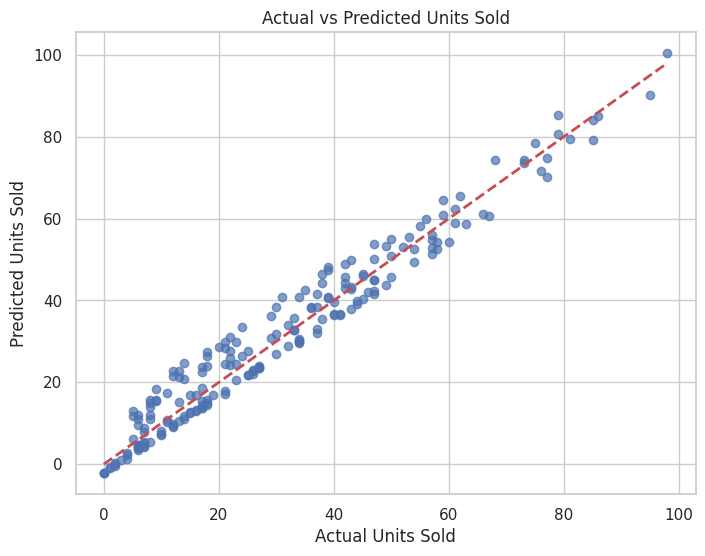

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(y_test , y_pred , alpha=0.7)
#alpha=0.7 makes the points slightly transparent.

plt.plot([y_test.min(),y_test.max()],#[x1, x2] → x-coordinates → [min, max]
   [y_test.min() , y_test.max()],#[y1, y2] → y-coordinates → [min, max]
         'r--',lw=2) #lw=line-width , #'r--'=red dashed line

plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs Predicted Units Sold')
plt.grid(True) #adds a grid for better visual alignment
plt.show()  #actually displays the plot

Interpretation of Plot:


If points lie close to red line → model is doing well ✅

If points are spread out wildly → model is underfitting or missing key features ❌

If there’s a pattern or curve → maybe linear regression isn't enough, try a more complex model later (e.g. Random Forest)

##2. Plot: Residuals vs Predicted

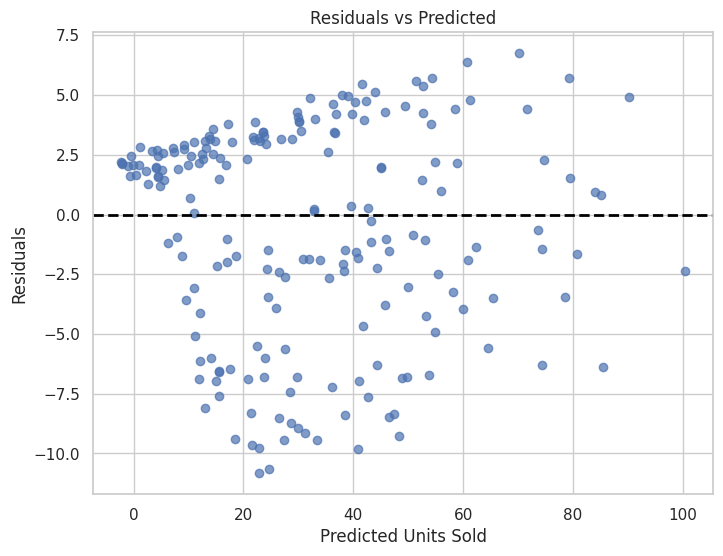

In [41]:
#residuals = prediction errors
residuals= y_test - y_pred
#A residual tells you : How far off the prediction was from the actual value

#plot the residuals
plt.figure(figsize=(8,6))

plt.scatter(y_pred , residuals ,alpha = 0.7)
#We're looking to see if errors are randomly scattered around 0
#If residuals form a curve or line → model is not capturing some pattern


plt.axhline(y=0, color='black' , linestyle='--',lw=2)
#Draws a horizontal dashed line at 0
#Acts as a baseline: we want most errors to hover around this line


plt.xlabel('Predicted Units Sold')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.show()

Interpretation of Residuals Plot:


✅ If the residuals are scattered evenly across the graph, it means:

Your model is well-fitted.

❌ If there's a shape or funnel pattern:

Your model might be biased or underfitting.

#STEP 5: Try an Advanced ML Model (Random Forest)

Why Random Forest?


It's a non-linear model (unlike Linear Regression)

Handles feature interactions automatically

Reduces overfitting using bagging (ensemble of trees)

Works great without heavy preprocessing

You get feature importance for free! (we’ll see that later)



In [42]:
#import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

###1. Initialize and Train the Model

In [43]:
#initialize the model with random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators = 100 , random_state=42)

#n_estimators=100: uses 100 trees in the forest (more = better usually)
#random_state=42: ensures reproducibility of results

#Train the model
rf_model.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

###2. Make Predictions

In [44]:
#predict on test data
rf_pred = rf_model.predict(X_test)

# accidentally i typed : rf_model = rf_model.predict(X_test)
# rf_model is no longer a model — it became a NumPy array, which doesn’t have a .predict() method.
# run all (& rf_pred = rf_model.predict(X_test)) => issue solved

###3. Evaluate the Model

In [45]:
#evaluate the model

rf_mae = mean_absolute_error(y_test , rf_pred)
rf_mse = mean_squared_error(y_test , rf_pred)
rf_r2 = r2_score(y_test , rf_pred)

print("Random Forest Model Evaluation:")
print(f"(MAE):{rf_mae : .2f}") #MAE (Mean Absolute Error): average of all absolute errors
print(f"(MSE):{rf_mse : .2f}") #MSE: squares the errors → punishes larger errors more
print(f"(R^2 score):{rf_r2 : .2f}") #R² Score: measures how well predictions fit (closer to 1 is better)

Random Forest Model Evaluation:
(MAE): 3.81
(MSE): 22.80
(R^2 score): 0.95


##4. Comapare both the models lr and rf

In [46]:
# Evaluation for Linear Regression
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [47]:
# Evaluation for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [48]:
#create a dataframe to compare

comparison_df = pd.DataFrame({
    'Model':['LinearRegression', 'RandomForest'],
    'MAE':[lr_mae ,rf_mae],
    'MSE':[lr_mse , rf_mse],
    'R^2 Score':[lr_r2 , rf_r2]
})


In [49]:
#Round values fro readability
comparison_df= comparison_df.round(2)

# This rounds all numeric values in the DataFrame to 2 decimal places for cleaner display.

In [50]:
#Sort by R2 Score
comparison_df = comparison_df.sort_values(by='R^2 Score',ascending=False)

#This **sorts the DataFrame** so that the **model with the highest R² Score appears on top**.

In [51]:
#display comparison
print("Model Comparison:")
print(comparison_df)

Model Comparison:
              Model   MAE    MSE  R^2 Score
0  LinearRegression  3.83  20.63       0.96
1      RandomForest  3.81  22.80       0.95


## Final Results

###1. MAE (Mean Absolute Error)

LinearRegression: 3.83

RandomForest: 3.81

Both models make very similar average errors, around 3.8 units. So on average, predictions are off by just ~3.8 units sold, which is excellent (if your sales are usually in tens or hundreds).

✅ Very low MAE — you’ve clearly trained good models!

###2. MSE (Mean Squared Error)

LinearRegression: 20.63

RandomForest: 22.80

This tells us how the models behave when there are larger errors.

📌 Even though Random Forest is slightly better on MAE, it’s a bit worse on MSE, meaning:

It may be making slightly larger errors in some edge cases/outliers than Linear Regression.

###3. R² Score (Explained Variance)

LinearRegression: 0.96

RandomForest: 0.95

Your Linear Regression explains 96% of the variability in demand (units_sold) Random Forest explains 95% of it — which is still amazing

✅ Both are excellent scores, but Linear Regression slightly edges out.

#STEP 6: Hyperparameter Tuning for Random Forest

Even though Random Forest performed well, its default parameters are generic.


By tuning the hyperparameters, you can:

Improve prediction accuracy ✅

Reduce overfitting ✅

Get a more optimal model for your specific dataset ✅

What We'll Do:

Understand what hyperparameters we’ll tune

Use GridSearchCV to find the best combination

Train a new, improved model

Evaluate it just like before

In [52]:
#import libraries
from sklearn.model_selection import GridSearchCV

#GridSearchCV: Tries different hyperparameter combinations using cross-validation.

from sklearn.ensemble import RandomForestRegressor

##Step 1. Set Up the Parameter Grid

In [53]:
#define parameter grid
param_grid = {
    'n_estimators': [50,100,200],

    #n_estimators: Number of Trees in the Forest
    # This sets how many decision trees will be built in the ensemble.
    # More trees = better performance, up to a point.

    'max_depth':[None,10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}

### 1. n_estimators: Number of Trees in the Forest

This sets how many decision trees will be built in the ensemble.

'n_estimators': [50, 100, 200]

50 => fewer trees --> faster , may underfit

100 => default value,good balance

200 => more tress ---> more stable predictions, but slower


###2. max_depth: Maximum Depth of Each Tree

'max_depth': [None, 10, 20]

=> Controls how deep each tree can grow (how many splits it can make).

None => No limit → trees grow until all leaves are pure or until min_samples_leaf is reached. May overfit.

10 => Limits the tree depth to 10 → prevents overfitting, faster training

20 => Allows more complexity than 10, but still prevents trees from growing too deep



###3. min_samples_split: Minimum Samples Needed to Split a Node

'min_samples_split': [2, 5]

=> Minimum number of data points required in a node to allow a split.

2 => Default → allows very deep trees (can overfit)

5 => Node must have at least 5 samples to be split → prunes the tree, reduces overfitting

###4. min_samples_leaf: Minimum Samples Required at a Leaf Node

'min_samples_leaf': [1, 2]

=>Minimum number of samples required to be in a leaf node (a final prediction point).

1 => Default → can lead to very small, pure leaves, risk of overfitting

2 => Forces leaves to have at least 2 samples → smooths predictions, prevents model from being too specific


###How Many Combinations in Total?

n_estimators: 3 options

max_depth: 3 options

min_samples_split: 2 options

min_samples_leaf: 2 options

Total combinations = 3 × 3 × 2 × 2 = 36




##Step 2 : Create Model and GridSearchCV



In [54]:
rf = RandomForestRegressor(random_state = 42)

In [55]:
grid_search = GridSearchCV(estimator = rf , # The model to tune
                           param_grid = param_grid , # Dictionary of hyperparameter options to try
                           cv=3, # 3-fold cross-validation — data is split into 3 parts and model is trained & validated on each part
                           scoring = 'r2', #Use R² score to decide which model is best
                           verbose = 2, #Shows progress of GridSearch in output
                           n_jobs = -1) #Use all CPU cores for faster search

##Step 3: Fit the Model to Training Data

In [56]:
grid_search.fit(X_train , y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

##Step 4: Print Best Hyperparameters

In [57]:
print("Best Parameters:" , grid_search.best_params_)

#this shows which combination of parameters gave the best R^2 score

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


##Step 5 : Use the Best Model to predict

In [58]:
best_rf = grid_search.best_estimator_
#This stores the best model found during GridSearchCV in the variable best_rf

best_rf_pred = best_rf.predict(X_test)
#This uses the best trained model to make predictions on your unseen test data (X_test).

## Step 6 : Evaluate the tuned model

In [59]:
mae = mean_absolute_error(y_test, best_rf_pred)
mse = mean_squared_error(y_test , best_rf_pred)
r2 = r2_score(y_test , best_rf_pred)

print("Tuned Random Forest Performance : ")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"R^2 score : {r2 : .2f}")

Tuned Random Forest Performance : 
MAE : 3.79
MSE : 22.50
R^2 score :  0.95


#(Optional) Compare Tuned and Untuned Model

## 1. Evaluate untuned Model


In [60]:
untuned_rf = RandomForestRegressor(random_state = 42)
untuned_rf.fit(X_train , y_train)
untuned_preds = untuned_rf.predict(X_test)

In [61]:
untuned_mae = mean_absolute_error(y_test, untuned_preds)
untuned_mse = mean_squared_error(y_test , untuned_preds)
untuned_r2 = r2_score(y_test ,untuned_preds)

##2. Evaluate Tuned Model

In [62]:
tuned_preds = best_rf.predict(X_test)

tuned_mae = mean_absolute_error(y_test , tuned_preds)
tuned_mse = mean_squared_error(y_test , tuned_preds)
tuned_r2 = r2_score(y_test , tuned_preds)

## 3. Combine results into a table

In [63]:
compare_df =  pd.DataFrame({
    'Model':['RandomForest(Untuned)' , 'RandomForest(Tuned)'] ,
    'MAE': [untuned_mae , tuned_mae],
    'MSE': [untuned_mse , tuned_mse],
    'R^2 Score' : [untuned_r2 , tuned_r2]
})


print("Model Comparison Table:")
print(compare_df)

Model Comparison Table:
                   Model       MAE        MSE  R^2 Score
0  RandomForest(Untuned)  3.810950  22.801738   0.953683
1    RandomForest(Tuned)  3.790058  22.497854   0.954300


##Final Verdict:


✅ Your tuned model is performing slightly better, but not drastically — which is common when the default model is already well-suited.
Still, it’s a net gain — and in real-world deployments, even small improvements in sales prediction models can mean big business impact 📈

#STEP 7 : Feature Importance

Goal of This Step:


We’ll use the tuned Random Forest model (best_rf) to:

Extract feature importances.

Visualize them in a bar chart.

Interpret what they actually mean

##1. Extract Feature Names & Importance **Scores**

In [64]:
#get the names of the features (column names used for training)
feature_names = X_train.columns
# X_train.columns → gives us a list of all the input feature names used to train the model.


#extract feature importance scores from the trained Random Forest Model
importances = best_rf.feature_importances_ #importances: numerical values for importance

#best_rf.feature_importances_ → after training, Random Forest automatically calculates how
#important each feature was in making predictions.
#oes this by averaging how much each feature reduced error across all trees in the forest.

## 2. Create a DataFrame for Visualization



In [65]:
# Create a new DataFrame to pair feature names with their importance scores

feature_importance_df =pd.DataFrame({
    'Feature': feature_names,
    'Importance':importances
    })
print(feature_importance_df)

            Feature  Importance
0             price    0.007804
1          discount    0.009403
2  competitor_price    0.008041
3         inventory    0.973788
4        is_weekend    0.000964


##3. Sort Features by Importance (Descending Order)

In [66]:
#sort features by impotance score(most important on top)
feature_importance_df = feature_importance_df.sort_values(by='Importance' , ascending = False)
print(feature_importance_df)

            Feature  Importance
3         inventory    0.973788
1          discount    0.009403
2  competitor_price    0.008041
0             price    0.007804
4        is_weekend    0.000964


## 4. Plot the Feature importance Bar Chart

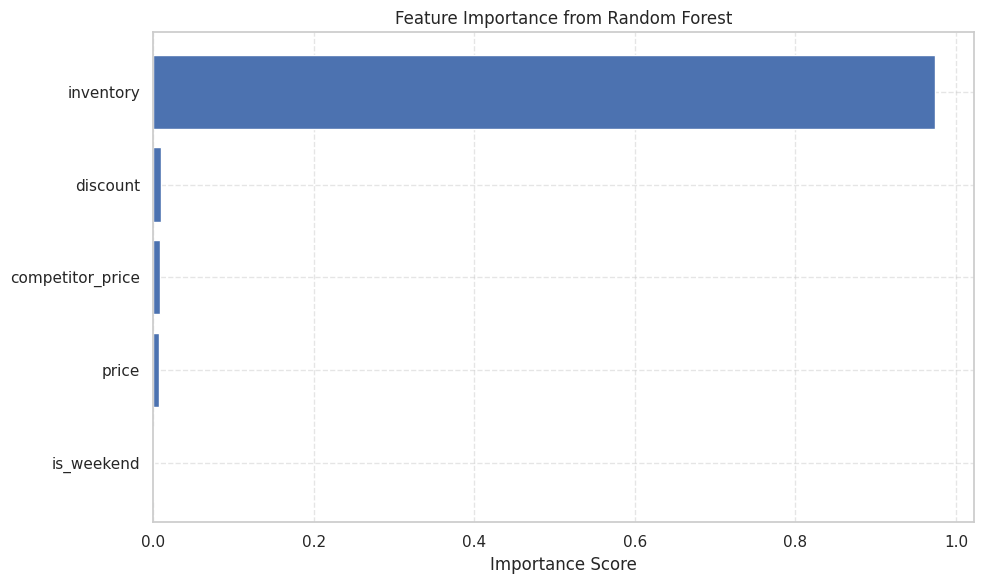

In [67]:
#plotting the sorted feature importance
plt.figure(figsize = (10,6))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'])
#plt.barh() → draws a horizontal bar chart, which is easier to read when labels are long (like feature names).

plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
#plt.gca().invert_yaxis() → flips the Y-axis to show the most important features at the top.

plt.grid(True , linestyle = '--',alpha=0.5)
plt.tight_layout()
plt.show()

##Business-Level Interpretation:

Inventory Control
→ If you're out of stock, you miss out on sales.
→ Suggestion: Your model should trigger reordering when demand is expected but stock is low.

Discount
→ Discounts drive sales — but be careful. Too many discounts = reduced profit.
→ Suggestion: Use the model to find the sweet spot — how much to discount to boost demand without hurting margins.

Competitor Price
→ You're not operating in isolation. If a competitor cuts prices, your demand drops.
→ Suggestion: Integrate competitive pricing into your strategy — maybe adjust prices dynamically using this signal.

#STEP 8: Residual Analysis & Error Visualization

 it'll help us see where and why the model is making mistakes

What is This Step About?

Residual = Actual Value - Predicted Value

This step helps you analyze:

  ->Are there specific patterns in model errors?

  ->Is the model systematically over- or under-predicting in certain cases?

  ->Are there any outliers or anomalies the model can't handle well?

We’ll Do 3 Main Things:

Task	Goal

1️⃣	Calculate residuals

2️⃣	Plot Residuals vs Predicted values

3️⃣	Plot a Histogram of Residuals

These steps help us validate model performance and check for bias.

## 1. Predict and calculate Residuals

In [68]:
#get predictions from the bes model
y_pred = best_rf.predict(X_test)

#calculate residuals (errors)
residuals = y_test - y_pred
#y_pred: Your model's predicted demand for the test set.

Residuals tell you how wrong the model was and in what direction (positive → underprediction, negative → overprediction).

##2. Plot Residuals vs Predicted Values

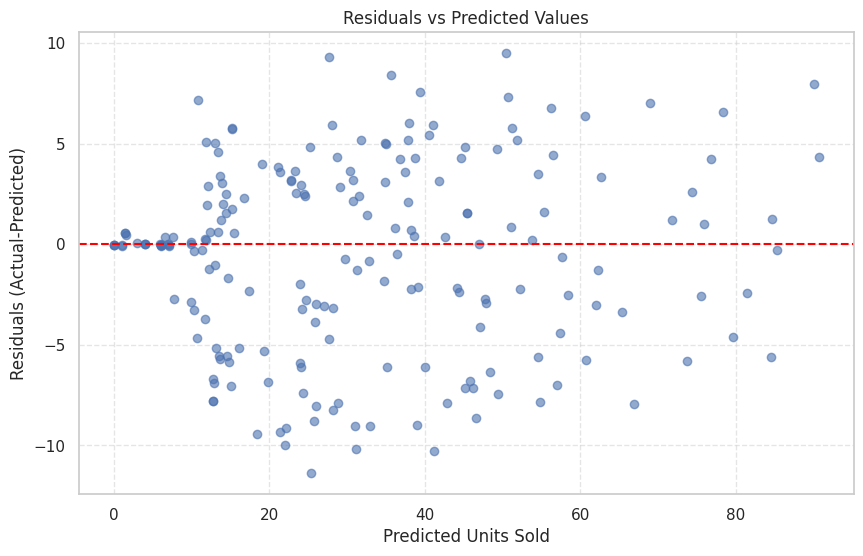

In [69]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred , residuals ,alpha = 0.6)
#plt.scatter(y_pred, residuals) → Each dot = one prediction and its error.

plt.axhline(y=0,color='red' , linestyle='--')
plt.xlabel('Predicted Units Sold')
plt.ylabel('Residuals (Actual-Predicted)')
plt.title('Residuals vs Predicted Values')
plt.grid(True , linestyle='--' ,alpha=0.5)
plt.show()

plt.axhline(y=0) → A horizontal line at 0. If residuals are close to this line, the model predicted well.

If you see:

🔴 Random scatter around the red line → ✅ Good model.

🔴 Curved patterns or cone shapes → ⚠️ Model bias or heteroscedasticity (variance not constant).



##3. Histogram of Residuals

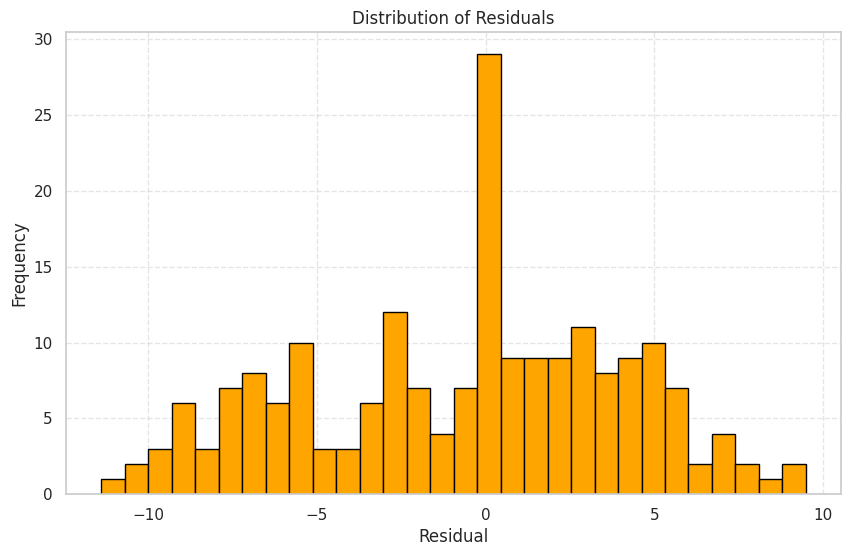

In [70]:
plt.figure(figsize=(10,6))
plt.hist(residuals,bins=30 , color='orange' , edgecolor = 'black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True , linestyle='--' , alpha=0.5)
plt.show()

We’re plotting how residuals are distributed.

If your model is performing well:

Histogram should look roughly like a bell curve (centered at 0).

This means most predictions are close to actuals.

📌 If it’s skewed, you may be under/overestimating systematically.



##Final Interpretation of Residual Analysis
🔹 Randomly Scattered Residuals

✅ This indicates:

Your model isn’t favoring any particular range of predicted values.

It means the errors are evenly spread, and your model is learning the actual relationships in the data — not just memorizing or missing key trends.

🔹 Bell-Shaped Histogram (Centered Around 0)

✅ This tells us:

Most predictions are close to the actual values.

There’s a normal distribution of errors, which is what we expect in a good regression model.

💡 Bottom Line: The model is well-behaved, no major bias, and ready for deployment-level tasks.



#STEP 9 : Save the Trained Model

Once  model is trained and tested,  need to save it so it can be:

Re-used later (without retraining)

Deployed in apps or web services

Shared with others (teams or recruiters!)

##Tool: joblib (better for models with large NumPy arrays, like Random Forest)

In [71]:
import joblib
#save the best Random Forest Model to a file
joblib.dump(best_rf, 'random_forest_model.pkl')

#'random_forest_model.pkl → This is the filename (you can name it anything you want,
#but .pkl is standard for pickle files).

#This line saves your trained model to disk as a .pkl file.

['random_forest_model.pkl']

You only need to train your model once. After that, just load it whenever needed.

## Load the Model Later for Prediction

When you want to use this model again (maybe in a new notebook, app, or deployment):

In [72]:
#load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

#use it to make prediction
prediction = loaded_model.predict(X_test)